In [11]:
# Fuzzy Mamdani
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

input_demand = 4000
input_inventory = 300

# Universe variables
x_demand = np.arange(1000, 5000, 1)
x_inventory = np.arange(100, 600, 1)
x_produce = np.arange(2000, 7000, 1)

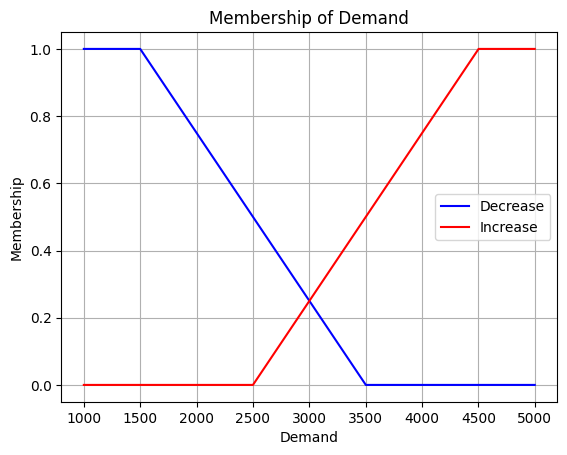

In [12]:
# Membership values
# Demand
demand_decrease = fuzz.trapmf(x_demand, [0, 0, 1500, 3500])
demand_increase =  fuzz.trapmf(x_demand, [2500, 4500, 5000, 5000])
plt.plot(x_demand, demand_decrease, 'b', linewidth = 1.5, label = 'Decrease')
plt.plot(x_demand, demand_increase, 'r', linewidth = 1.5, label = 'Increase')
plt.xlabel('Demand')
plt.ylabel('Membership')
plt.grid(True)
plt.title('Membership of Demand')
plt.legend()
plt.show()

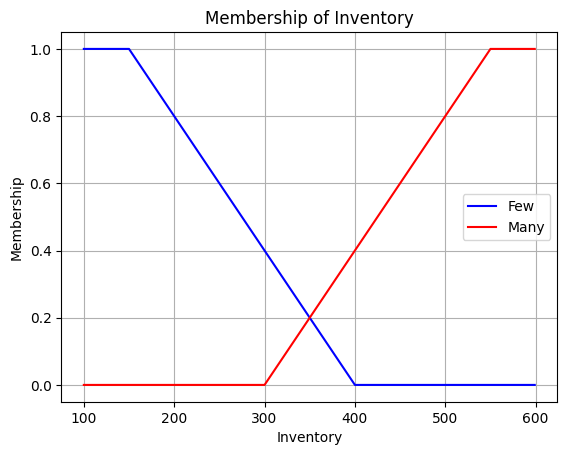

In [13]:
# Inventory
iventory_few = fuzz.trapmf(x_inventory, [0, 0, 150, 400])
inventory_many =  fuzz.trapmf(x_inventory, [300, 550, 600, 600])
plt.plot(x_inventory, iventory_few, 'b', linewidth = 1.5, label = 'Few')
plt.plot(x_inventory, inventory_many, 'r', linewidth = 1.5, label = 'Many')
plt.xlabel('Inventory')
plt.ylabel('Membership')
plt.grid(True)
plt.title('Membership of Inventory')
plt.legend()
plt.show()

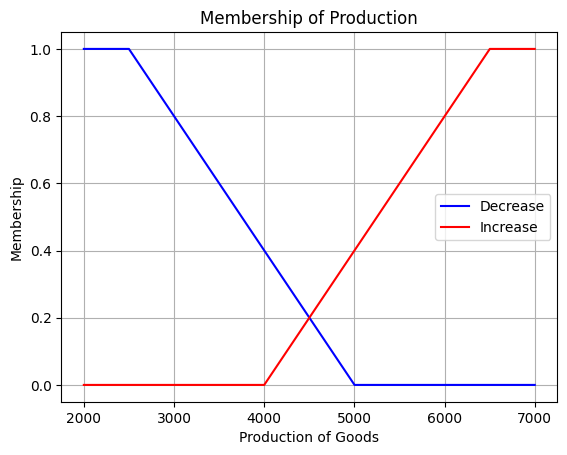

In [14]:
# Production of Goods
produce_decrease = fuzz.trapmf(x_produce, [0, 0, 2500, 5000])
produce_increase = fuzz.trapmf(x_produce, [4000, 6500, 7000, 7000])
plt.plot(x_produce, produce_decrease, 'b', linewidth = 1.5, label = 'Decrease')
plt.plot(x_produce, produce_increase, 'r', linewidth = 1.5, label = 'Increase')
plt.xlabel('Production of Goods')
plt.ylabel('Membership')
plt.grid(True)
plt.title('Membership of Production')
plt.legend()
plt.show()

In [15]:
# Membership function
def fungsiKeaggotaan_demand(produce):
    demand_level_decrease = fuzz.interp_membership(x_demand, demand_decrease, produce)
    demand_level_increase = fuzz.interp_membership(x_demand, demand_increase, produce)

    return demand_level_decrease, demand_level_increase

def fungsiKeaggotaan_inventory(inventory):
    inventory_level_few = fuzz.interp_membership(x_inventory, iventory_few, inventory)
    inventory_level_many = fuzz.interp_membership(x_inventory, inventory_many, inventory)

    return inventory_level_few, inventory_level_many

# Degree of Membership
# Demand
demandInput_level = fungsiKeaggotaan_demand(input_demand)
inventoryInput_level = fungsiKeaggotaan_inventory(input_inventory)
print("Degree of Membership Demand: ", demandInput_level)
print("Degree of Membership Inventory: ", inventoryInput_level)

Degree of Membership Demand:  (np.float64(0.0), np.float64(0.75))
Degree of Membership Inventory:  (np.float64(0.4), np.float64(0.0))


In [16]:
# Rules

# IF Demand DECREASES And Inventory MANY THEN Production of Goods DECREASES
R1 = np.fmin(demandInput_level[0], inventoryInput_level[1])

# IF Demand DECREASES And Inventory FEW THEN Production of Goods DECREASES
R2 = np.fmin(demandInput_level[0], inventoryInput_level[0])

# IF Demand INCREASES And Inventory MANY THEN Production of Goods INCREASES
R3 = np.fmin(demandInput_level[1], inventoryInput_level[1])

# IF Demand INCREASES And Inventory FEW THEN Production of Goods INCREASES
R4 = np.fmin(demandInput_level[1], inventoryInput_level[0])

productionOfGoods_decrease = np.fmax(R1, R2)
productionOfGoods_increase = np.fmax(R3, R4)

print("Production of Goods DECREASES: ", productionOfGoods_decrease)
print("Production of Goods INCREASES: ", productionOfGoods_increase)



Production of Goods DECREASES:  0.0
Production of Goods INCREASES:  0.4


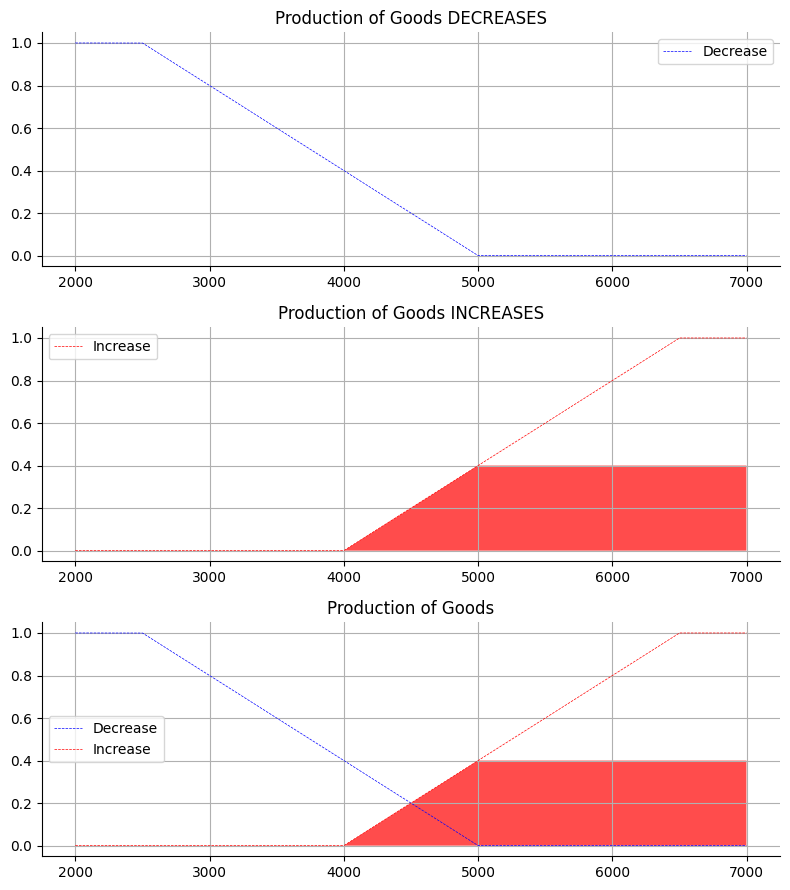

In [17]:
# Plotting Arsiran
productionOfGoods_decrease = np.fmin(productionOfGoods_decrease, produce_decrease)
productionOfGoods_increase = np.fmin(productionOfGoods_increase, produce_increase)

# Titik Awal
pog_0 = np.zeros_like(x_produce)
pog_decrease = np.zeros_like(produce_decrease)
pog_increase = np.zeros_like(produce_increase)

# Plotting
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (8, 9))

ax0.fill_between(x_produce, pog_decrease, productionOfGoods_decrease, facecolor = 'b', alpha = 0.7)
ax0.plot(x_produce, produce_decrease, 'b', linewidth = 0.5, linestyle = '--', label = "Decrease")
ax0.set_title('Production of Goods DECREASES')
ax0.grid(True)
ax0.legend()

ax1.fill_between(x_produce, pog_increase, productionOfGoods_increase, facecolor = 'r', alpha = 0.7)
ax1.plot(x_produce, produce_increase, 'r', linewidth = 0.5, linestyle = '--', label = "Increase")
ax1.set_title('Production of Goods INCREASES')
ax1.grid(True)
ax1.legend()

ax2.fill_between(x_produce, pog_0, productionOfGoods_decrease, facecolor = 'b', alpha = 0.7)
ax2.plot(x_produce, produce_decrease, 'b', linewidth = 0.5, linestyle = '--', label = "Decrease")
ax2.fill_between(x_produce, pog_0, productionOfGoods_increase, facecolor = 'r', alpha = 0.7)
ax2.plot(x_produce, produce_increase, 'r', linewidth = 0.5, linestyle = '--', label = "Increase")
ax2.set_title('Production of Goods')
ax2.grid(True)
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()


In [18]:
# Komposisi
komposisi = np.fmax(productionOfGoods_decrease, productionOfGoods_increase)

# Defuzzifikasi
productionOfGoods = fuzz.defuzz(x_produce, komposisi, 'centroid')
print("Production of Goods: ", productionOfGoods)  

# Fuzzy untuk Membership Function
final = fuzz.interp_membership(x_produce, komposisi, productionOfGoods)
print(final)

Production of Goods:  5732.826663999169
0.4
